Aug 11-17

- Match Harris-Siena catalogs;

- Take the value of m_tot (apparent magnitude) for z-band (Z_COG_PARAMS_MTOT) of the matching galaxies;

- Find Absolute magnitude M_z from that;

- Plot the relation M_z vs N_GCs;

- Apply that relation on Yang galaxies (which has M_z -> find N_GCs);

- Find N_GC for all galaxies in the groups of Yang;

- Plot total N_GC vs M_h;


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [2]:
from astropy.table import Table
from astropy.coordinates import Angle

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [4]:
#load H data 
data_H = fits.getdata('/data/lemn/datalit/GC_cat_H13.fits')

In [5]:
err_GC = np.loadtxt('/data/lemn/datalit/GC_cat_H13.txt',usecols=(14))

In [6]:
#load Siena data 
data_S = fits.getdata('/data/lemn/Sienna/SGA-2020.fits')

In [7]:
#load Siena data tractor, which is the external dust transmission 
data_T = fits.getdata('/data/lemn/Sienna/SGA-2020.fits', ext=2)

In [8]:
#exclude the non value data 
select = data_S['Z_COG_PARAMS_MTOT'] > 0

In [9]:
data_S = data_S[select]
data_T = data_T[select]

In [10]:
data_T.shape


(367305,)

In [11]:
data_S.shape

(367305,)

In [12]:
trans = data_T['MW_TRANSMISSION_Z']

In [13]:
m_z2 = data_S['Z_COG_PARAMS_MTOT']
m_z2 +=  2.5*np.log10(trans)

<ErrorbarContainer object of 3 artists>

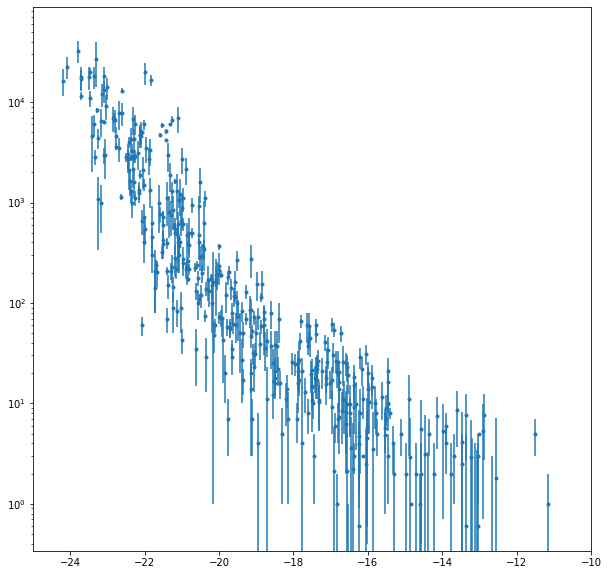

In [14]:
plt.figure(figsize=(10,10))
plt.xlim(-25,-10)
plt.yscale('log')
plt.errorbar(data_H['Abs mag'], data_H['NGCs'],yerr=err_GC,fmt='.')

In [15]:
#coordinates of H and Siena catalog
c_H = SkyCoord(ra=data_H['RA']*u.degree, dec=data_H['DEC']*u.degree, frame='icrs')
c_S = SkyCoord(ra=data_S['RA']*u.degree, dec=data_S['DEC']*u.degree, frame='icrs')

In [16]:
#source.match_to_catalog_sky(catalog)
idx, d2d, d3d = c_H.match_to_catalog_sky(c_S)

In [17]:
d = d2d.arcsec #convert d2d to [arcsec], then take the value and remove the unit
#print(d2d)

In [18]:
#restrict to distance between two match galaxy is smaller than 10 arcsec
count = len(d)
for i in range(0,len(d)):
    if d[i] > 10:
        count -= 1
#print(count)   

idx_H = np.zeros(count)
idx_S = np.zeros(count)
ii = 0
for i in range(0,len(d)):
    if d[i] < 10:
        idx_H[ii] = i
        idx_S[ii] = idx[i]
        ii += 1

In [19]:
#take the apparent mag from Siena galaxies
m_z = np.zeros(count)
for i in range(0, count):
    j = int(idx_S[i])
    m_z[i] = m_z2[j]

calculate M_z (absolute magnitude of z-band)

$M = m -5\log_{10} \frac{d}{10pc}$

In [20]:
idx_S = idx_S.astype(int)
idx_H = idx_H.astype(int)

In [21]:
#get their redshift
z = data_S[idx_S]['Z_LEDA']

In [28]:
print(z)

[ 3.5124298e-03  5.2002637e-04  7.8150723e-03  8.0809239e-03
  1.7957423e-02  6.1702686e-03  5.7282960e-03  6.2976900e-04
  5.8487128e-03  4.9494240e-03  3.3132921e-03  2.3214059e-02
  5.1135374e-03  5.5968720e-03  1.9059853e-03  4.7279373e-03
  5.9651267e-03  5.8070170e-03  4.4190572e-03  5.0911889e-03
  7.4051227e-03  4.7309394e-03  4.2292592e-03  4.6415441e-03
  3.9574043e-03  5.1008617e-03  4.9377494e-03  6.0621938e-03
  4.2886334e-03  5.5371639e-03  6.8470696e-03  2.1344766e-03
  4.5831706e-03  4.0194471e-03  4.3166527e-03  6.7746867e-03
  5.4561077e-03  6.2333117e-03  4.4163885e-03  6.2523251e-03
  5.7606515e-03  5.4871291e-03  5.3647114e-03  5.6482409e-03
  4.2045754e-03 -9.9000000e+01  3.0721251e-03  3.8763480e-03
  4.5968466e-03  4.7556232e-03  1.9676946e-03  6.7586754e-03
  5.9754672e-03  7.1149217e-03 -9.9000000e+01  4.3266597e-03
  4.6305363e-03  5.4641133e-03  4.8190001e-03  3.6692049e-03
  5.5635152e-03  3.4727356e-03  6.6045690e-03  4.4764299e-03
  5.1569007e-03  4.98011

In [23]:
H_0 = 67.6 #[km/s/Mpc]
c   = 299792456/10**3 #[km/s] 
d   = z*c/H_0*10**6  #[pc]

In [27]:
print(d)

[ 1.55769234e+07  2.30621290e+06  3.46582832e+07  3.58372803e+07
  7.96375732e+07  2.73639069e+07  2.54038467e+07  2.79289961e+06
  2.59378700e+07  2.19497051e+07  1.46937876e+07  1.02949707e+08
  2.26775150e+07  2.48210068e+07  8.45266342e+06  2.09674568e+07
  2.64541435e+07  2.57529583e+07  1.95976334e+07  2.25784035e+07
  3.28402367e+07  2.09807701e+07  1.87559185e+07  2.05843201e+07
  1.75502968e+07  2.26213017e+07  2.18979301e+07  2.68846169e+07
  1.90192299e+07  2.45562134e+07  3.03653851e+07  9.46597672e+06
  2.03254452e+07  1.78254433e+07  1.91434917e+07  3.00443821e+07
  2.41967449e+07  2.76434917e+07  1.95858002e+07  2.77278118e+07
  2.55473385e+07  2.43343201e+07  2.37914219e+07  2.50488186e+07
  1.86464500e+07 -4.39045188e+11  1.36242609e+07  1.71908283e+07
  2.03860950e+07  2.10902367e+07  8.72633171e+06  2.99733734e+07
  2.65000019e+07  3.15532551e+07 -4.39045188e+11  1.91878700e+07
  2.05355034e+07  2.42322483e+07  2.13713017e+07  1.62721901e+07
  2.46730785e+07  1.54008

In [24]:
Mag_z = m_z - 5*np.log10(d/10)

/tmp/ipykernel_68620/3450416603.py:1: RuntimeWarning: invalid value encountered in log10
  Mag_z = m_z - 5*np.log10(d/10)


In [25]:
print(Mag_z)

[-21.95063722 -13.93582153 -22.0424648  -23.44855033 -23.20400012
 -22.70515855 -22.64287224 -16.23133425 -22.35073654 -22.1034142
 -21.50075839 -23.86932083 -20.87903342 -22.03925486 -17.81180771
 -17.78682978 -24.39988594 -19.1612733  -19.32883984 -22.72672859
 -18.00157466 -20.14222251 -18.93428757 -20.75868738 -21.86428846
 -18.85917491 -21.17368357 -18.5648376  -18.20594599 -17.99900379
 -18.92627346 -17.61309168 -17.91899405 -17.94890248 -21.13021381
 -18.02244427 -21.48524343 -19.81146486 -21.26473265 -23.17813523
 -21.67049449 -16.62152291 -20.4205446  -18.81636399 -21.66468735
          nan -20.15845555 -17.2012681  -18.23062446 -23.13997285
 -19.76518707 -19.82366435 -23.37266111 -20.74893922          nan
 -19.13614882 -21.47312361 -19.79103479 -21.13902876 -17.12834172
 -21.43217269 -18.45281396 -18.25082887 -19.71433474 -16.65824681
 -17.67863073 -18.67562135 -18.84748511 -20.97847718 -20.52847179
 -20.54196375 -22.37270144 -22.74051911 -20.28642075 -24.24493479
 -18.662335

In [30]:
N_GC = data_H[idx_H]['NGCs']

In [31]:
Mag_v = data_H[idx_H]['Abs mag']

In [32]:
err_GC2 = err_GC[idx_H]

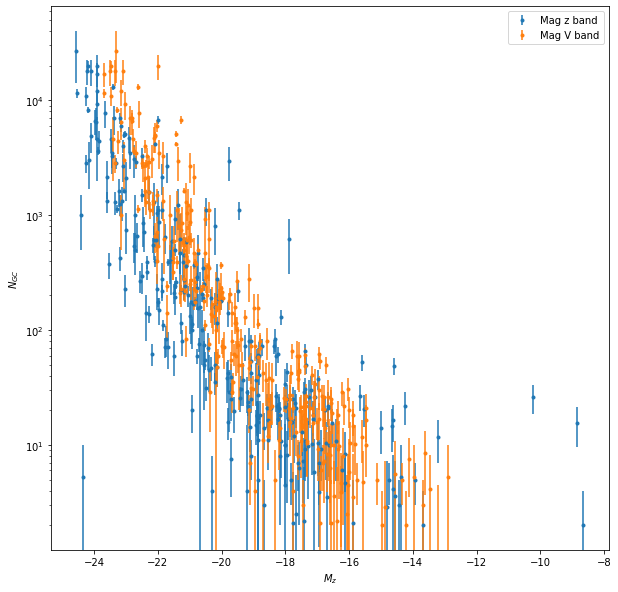

In [256]:
#plot number of GCs as a function of galaxy z-band abs magnitude
plt.figure(figsize=[10,10])
plt.xlabel('$M_z$')
plt.ylabel('$N_{GC}$')
plt.yscale('log')
plt.errorbar(Mag_z,N_GC,yerr=err_GC2,fmt='.', label='Mag z band')
plt.errorbar(Mag_v,N_GC,yerr=err_GC2,fmt='.', label='Mag V band')
plt.legend()

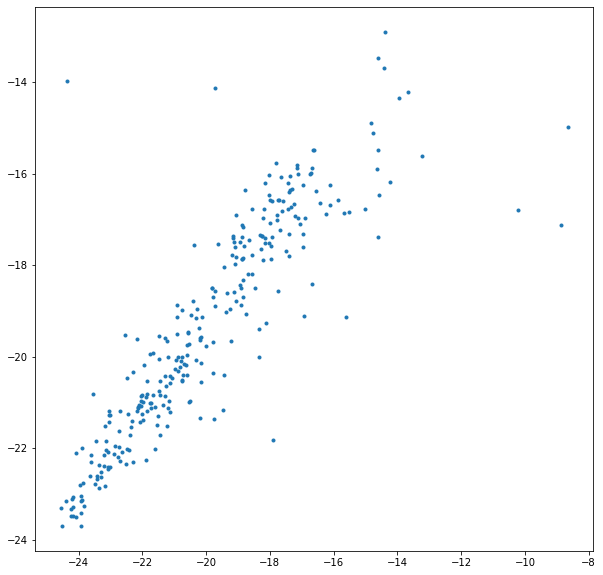

In [33]:
plt.figure(figsize=(10,10))
#plt.xlim(-26,-15)
#plt.ylim(-26,-15)
plt.plot(Mag_z,Mag_v,'.')

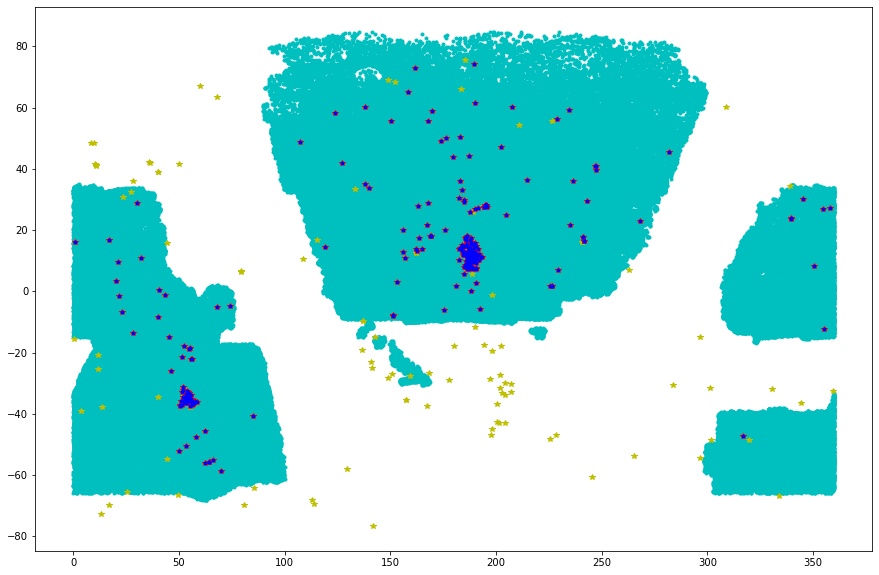

In [259]:
plt.figure(figsize=(15,10))
plt.plot(data_S['RA'], data_S['DEC'],'c.')
plt.plot(data_H['RA'], data_H['DEC'],'y*')
plt.plot(data_S[idx_S]['RA'], data_S[idx_S]['DEC'],'r*')
plt.plot(data_H[idx_H]['RA'], data_H[idx_H]['DEC'],'b.')

In [161]:
print('number of matched galaxies')
print(len(idx_H3))

number of matched galaxies
297
